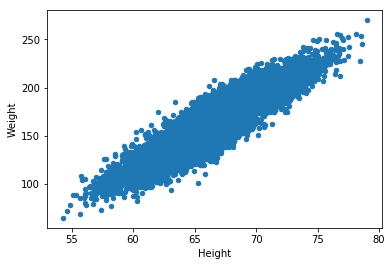

In [16]:
import pandas as pd
np = pd.np
import matplotlib
%matplotlib inline
df = pd.read_csv('../shared-resources/heights_weights_genders.csv')
df.plot.scatter(x='Height', y='Weight')
# !pip install keras
import keras

In [17]:
X = df[['Height', 'Weight']].values
y = (df.Gender == 'Female').astype(int)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### keras documentation:

1. [activation functions](https://keras.io/activations/)  
2. [loss functions](https://keras.io/losses/)  
3. [optimization algorithms](https://keras.io/optimizers/)  

In [18]:
from keras.models import Sequential
from keras.layers import Activation, Dense

model = Sequential()
model.add(Dense(1, input_shape=X.shape[1:]))  # model.layers[0].get_weights()[:].shape: [(2,),]
model.add(Activation('linear'))  # relu, softmax, sigmoid
model.compile(loss='mean_squared_error', optimizer='sgd') 
# notice that there are 2 random weights and a bias (initialized to zero), just like we had before
print(model.layers[0].get_weights())
    
    

[array([[-1.40812075],
       [-1.19805884]], dtype=float32), array([ 0.], dtype=float32)]


In [41]:
model.fit(X, y, epochs=20, batch_size=10)

Epoch 1/20
10000/10000 [==============================] - 0s - loss: 0.0879     
Epoch 2/20
10000/10000 [==============================] - 0s - loss: 0.0878     
Epoch 3/20
10000/10000 [==============================] - 0s - loss: 0.0879     
Epoch 4/20
10000/10000 [==============================] - 0s - loss: 0.0878     
Epoch 5/20
10000/10000 [==============================] - 0s - loss: 0.0878     
Epoch 6/20
10000/10000 [==============================] - 0s - loss: 0.0879     
Epoch 7/20
10000/10000 [==============================] - 0s - loss: 0.0879     
Epoch 8/20
10000/10000 [==============================] - 0s - loss: 0.0879     
Epoch 9/20
10000/10000 [==============================] - 0s - loss: 0.0879     
Epoch 10/20
10000/10000 [==============================] - 0s - loss: 0.0879     
Epoch 11/20
10000/10000 [==============================] - 0s - loss: 0.0879     
Epoch 12/20
10000/10000 [==============================] - 0s - loss: 0.0879     
Epoch 13/20
10000/10000 [

In [22]:
ypred = model.predict(X)
print(ypred.shape)
print(y.shape)
mad = np.abs(ypred - y.reshape(len(y), 1)).mean()
print(mad)

(10000, 1)
(10000,)
0.326112252027


/home/hobs/.virtualenvs/civicu/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [26]:
# Your turn: compute RMSE and compare to your "Pure Python" accuracy
df.Height.dtype

dtype('float64')

In [39]:
# Your turn: plot your results
from seaborn.utils import plt
plt.lmplot()
print(X[:,0].shape)
print(len(mask))
types = X[:,0].T[~mask].apply(lambda x: not isinstance(x, float))
print(pd.np.sum(types))
mask = ypred.astype(bool)
ax =  pd.DataFrame(X[mask]).plot(kind='scatter', alpha=.5, x=0, y=1, c='red')
ax =  pr.DataFrame(X[~mask]).plot(kind='scatter', alpha=.1, x=0, y=1, c='green', ax=ax)

(10000,)
10000


IndexError: too many indices for array

In [ ]:
# can you think of a better NN architecture?
# Your turn: add another neuron, do you get better accuracy if it's on the same layer (parallel) or on a second layer (in series)
# Your turn: now you have a "budget" of 3 neurons... give it a go!

Try it on the Iris Data!
that's multiclass so you need to use `pd.get_dummies`
And your last Keras layer needs 3 neurons (3 outputs for the 3 possible classes)